In [ ]:
# Import Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Import Dataset

In [2]:
weather_data = pd.read_csv('weather_classification_data.csv')

# Data Preprocessing

In [3]:
weather_data.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


# Null Values and duplicate values

In [4]:
weather_data.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [5]:
weather_data.duplicated().sum()

0

In [6]:
weather_data.shape

(13200, 11)

In [7]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


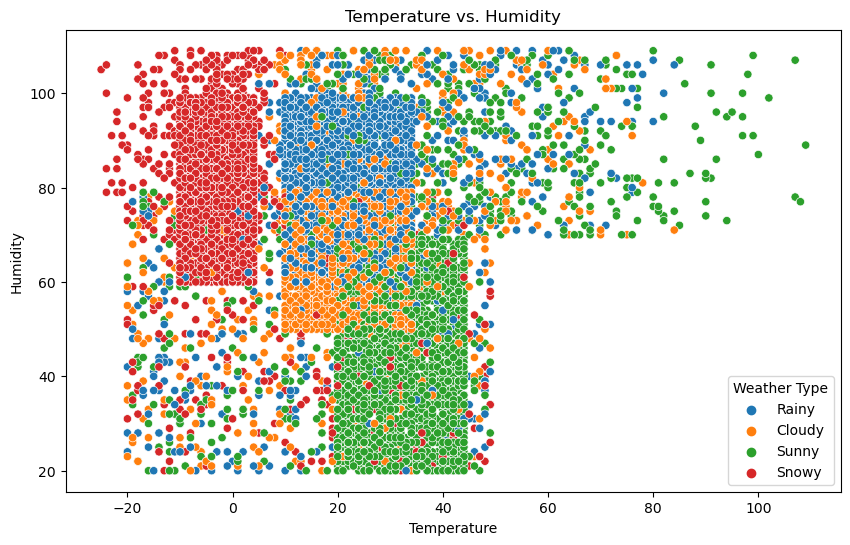

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=weather_data, x='Temperature', y='Humidity', hue='Weather Type')
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()


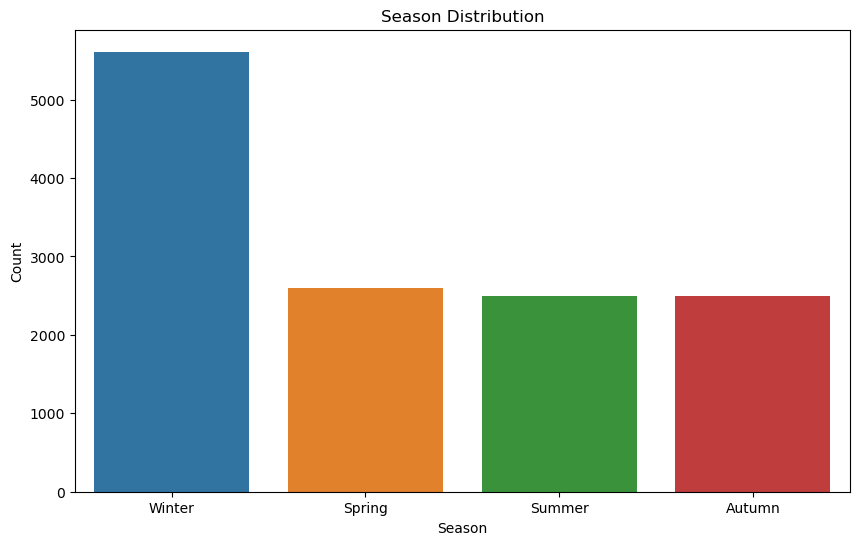

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data=weather_data, x='Season')
plt.title('Season Distribution')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()


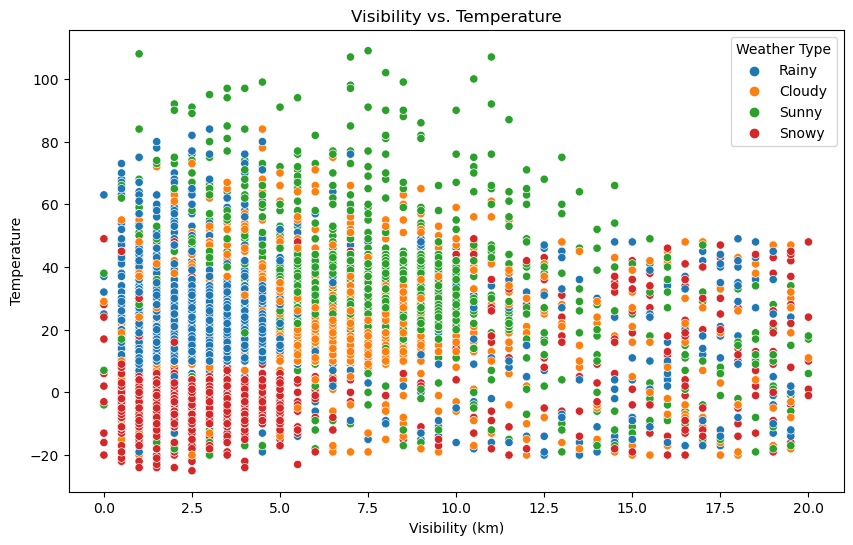

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=weather_data, x='Visibility (km)', y='Temperature', hue='Weather Type')
plt.title('Visibility vs. Temperature')
plt.xlabel('Visibility (km)')
plt.ylabel('Temperature')
plt.show()

# Feature Engineering

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
weather_data['Weather Type'] = le.fit_transform(weather_data['Weather Type'])
weather_data['Location'] = le.fit_transform(weather_data['Location'])
weather_data['Cloud Cover'] = le.fit_transform(weather_data['Cloud Cover'])
weather_data['Season'] = le.fit_transform(weather_data['Season'])

In [12]:
weather_data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1.990227,1005.827896,4.005758,1.849394,5.462917,1.094091,1.500000
std,17.386327,20.194248,6.908704,31.946541,1.012302,37.199589,3.856600,1.164824,3.371499,0.791420,1.118076
min,-25.000000,20.000000,0.000000,0.000000,0.000000,800.120000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,2.000000,994.800000,1.000000,1.000000,3.000000,0.000000,0.750000
50%,21.000000,70.000000,9.000000,58.000000,2.000000,1007.650000,3.000000,2.000000,5.000000,1.000000,1.500000
75%,31.000000,84.000000,13.500000,82.000000,3.000000,1016.772500,7.000000,3.000000,7.500000,2.000000,2.250000
max,109.000000,109.000000,48.500000,109.000000,3.000000,1199.210000,14.000000,3.000000,20.000000,2.000000,3.000000


In [13]:
weather_data.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

# Target Variable Understanding

In [14]:
weather_data['Weather Type'].value_counts()

Weather Type
1    3300
0    3300
3    3300
2    3300
Name: count, dtype: int64

# Correlation Understanding

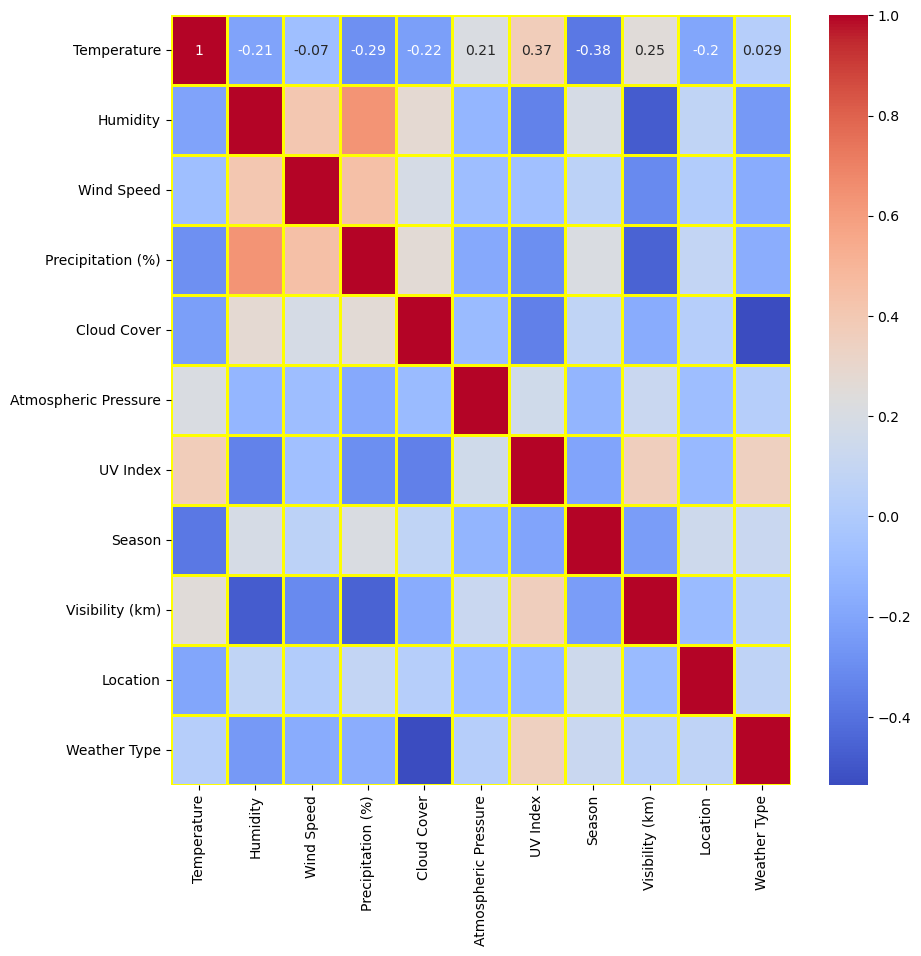

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(weather_data.corr(), annot=True, cmap='coolwarm',linecolor='yellow',linewidths=0.95)
plt.show()

# Visualization

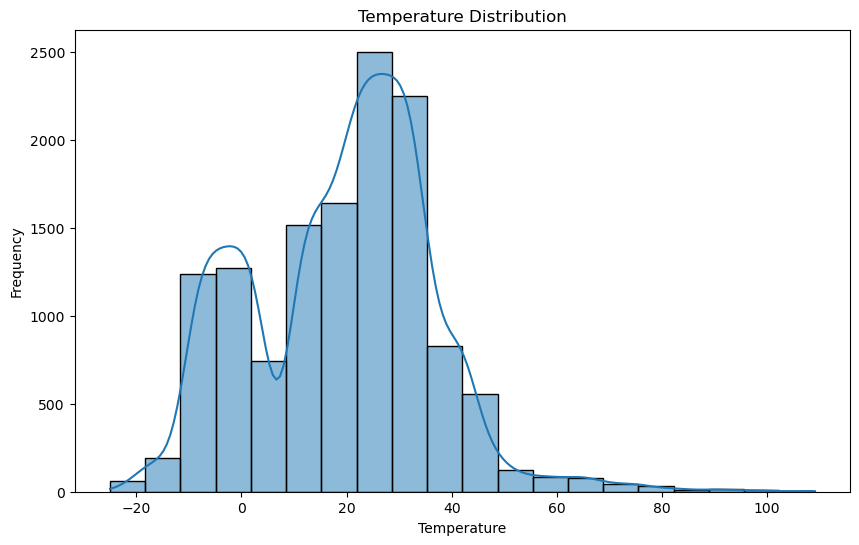

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(weather_data['Temperature'], bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


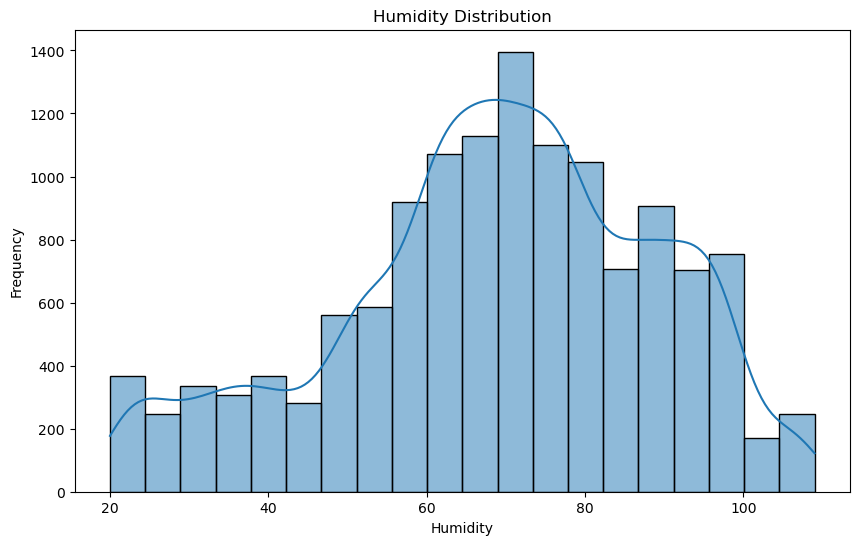

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(weather_data['Humidity'], bins=20, kde=True)
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()


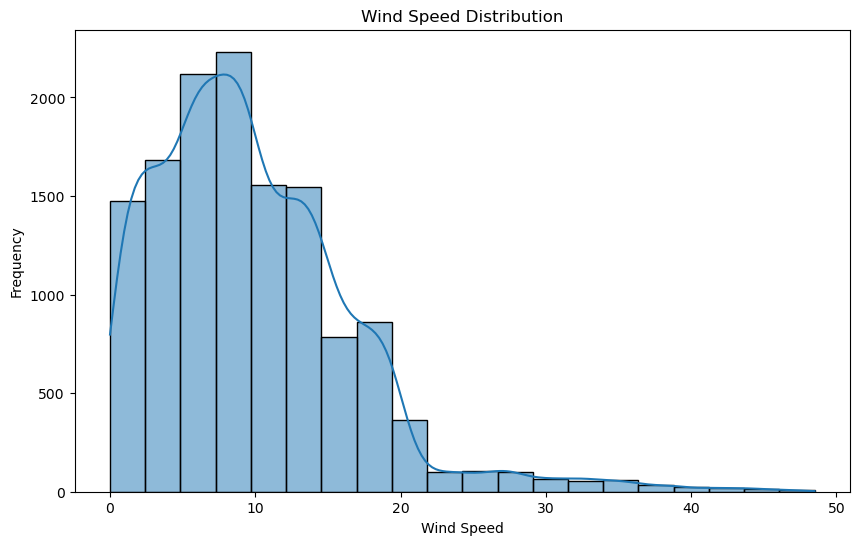

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(weather_data['Wind Speed'], bins=20, kde=True)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()


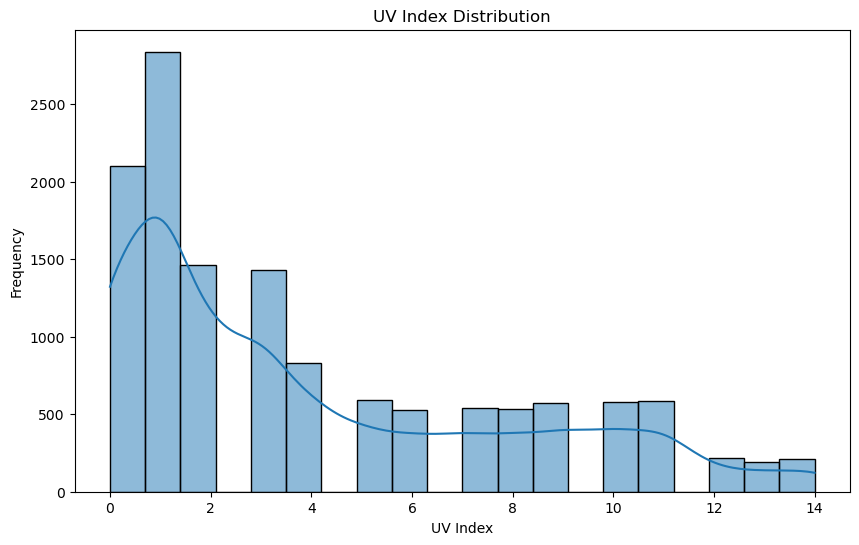

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(weather_data['UV Index'], bins=20, kde=True)
plt.title('UV Index Distribution')
plt.xlabel('UV Index')
plt.ylabel('Frequency')
plt.show()


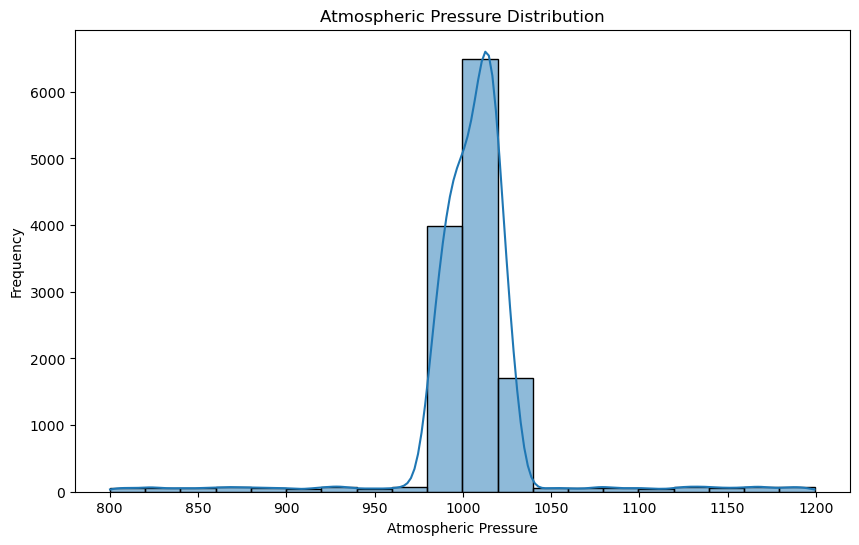

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(weather_data['Atmospheric Pressure'], bins=20, kde=True)
plt.title('Atmospheric Pressure Distribution')
plt.xlabel('Atmospheric Pressure')
plt.ylabel('Frequency')
plt.show()


# Feature Splitting, Train test split

In [21]:
X1 = weather_data.drop('Weather Type', axis=1)
y1 = weather_data['Weather Type']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

# Model Building

# LGBM

In [23]:
#pip install lightgbm

In [24]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()

In [25]:
clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 9240, number of used features: 10
[LightGBM] [Info] Start training from score -1.371256
[LightGBM] [Info] Start training from score -1.382837
[LightGBM] [Info] Start training from score -1.405085
[LightGBM] [Info] Start training from score -1.386294


LGBMClassifier()

In [26]:
y_pred = clf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))

0.9131313131313131


In [28]:

print(confusion_matrix(y_test, y_pred))

[[853  56  25  21]
 [ 55 891  20  16]
 [ 23  16 974  20]
 [ 41  26  25 898]]


In [29]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       955
           1       0.90      0.91      0.90       982
           2       0.93      0.94      0.94      1033
           3       0.94      0.91      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



# DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred2 = model.predict(X_test)

In [32]:
print(accuracy_score(y_test, y_pred2))

0.9012626262626262


In [33]:
print(confusion_matrix(y_test, y_pred2))

[[833  59  25  38]
 [ 54 881  18  29]
 [ 16  26 967  24]
 [ 38  32  32 888]]


In [34]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       955
           1       0.88      0.90      0.89       982
           2       0.93      0.94      0.93      1033
           3       0.91      0.90      0.90       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



# RidgeClassifier

In [35]:
from sklearn.linear_model import RidgeClassifier
model1 = RidgeClassifier()
model1.fit(X_train, y_train)

RidgeClassifier()

In [36]:
y_pred3 = model1.predict(X_test)

In [37]:
print(accuracy_score(y_test, y_pred3))

0.7919191919191919


In [38]:
print(confusion_matrix(y_test, y_pred3))

[[735 103  53  64]
 [ 44 745 156  37]
 [ 28  10 967  28]
 [194  69  38 689]]


In [39]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       955
           1       0.80      0.76      0.78       982
           2       0.80      0.94      0.86      1033
           3       0.84      0.70      0.76       990

    accuracy                           0.79      3960
   macro avg       0.79      0.79      0.79      3960
weighted avg       0.79      0.79      0.79      3960



# RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_pred4 = model2.predict(X_test)

In [42]:
print(accuracy_score(y_test, y_pred4))

0.9133838383838384


In [43]:
print(confusion_matrix(y_test, y_pred4))

[[858  51  26  20]
 [ 53 897  15  17]
 [ 31  16 971  15]
 [ 44  23  32 891]]


In [44]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       955
           1       0.91      0.91      0.91       982
           2       0.93      0.94      0.94      1033
           3       0.94      0.90      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



# GradientBoostingClassifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

model3 = GradientBoostingClassifier()
model3.fit(X_train, y_train)

GradientBoostingClassifier()

In [46]:
y_pred5 = model3.predict(X_test)

In [47]:
print(accuracy_score(y_test, y_pred5))

0.9073232323232323


In [48]:
print(confusion_matrix(y_test, y_pred5))

[[843  59  27  26]
 [ 44 899  25  14]
 [ 17  24 969  23]
 [ 45  25  38 882]]


In [49]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       955
           1       0.89      0.92      0.90       982
           2       0.92      0.94      0.93      1033
           3       0.93      0.89      0.91       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



# Voting Classifier

In [50]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [51]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = SVC()

In [52]:
ensemble = VotingClassifier(estimators=[('lr', clf1), ('knn', clf2), ('svc', clf3)], voting='hard')

In [53]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()), ('svc', SVC())])

In [54]:
y_pred6 = ensemble.predict(X_test)

In [55]:
print(accuracy_score(y_test, y_pred6))

0.8606060606060606


In [56]:
print(confusion_matrix(y_test, y_pred6))

[[775 106  33  41]
 [ 51 873  42  16]
 [ 39  14 967  13]
 [ 76  95  26 793]]


In [57]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       955
           1       0.80      0.89      0.84       982
           2       0.91      0.94      0.92      1033
           3       0.92      0.80      0.86       990

    accuracy                           0.86      3960
   macro avg       0.86      0.86      0.86      3960
weighted avg       0.86      0.86      0.86      3960



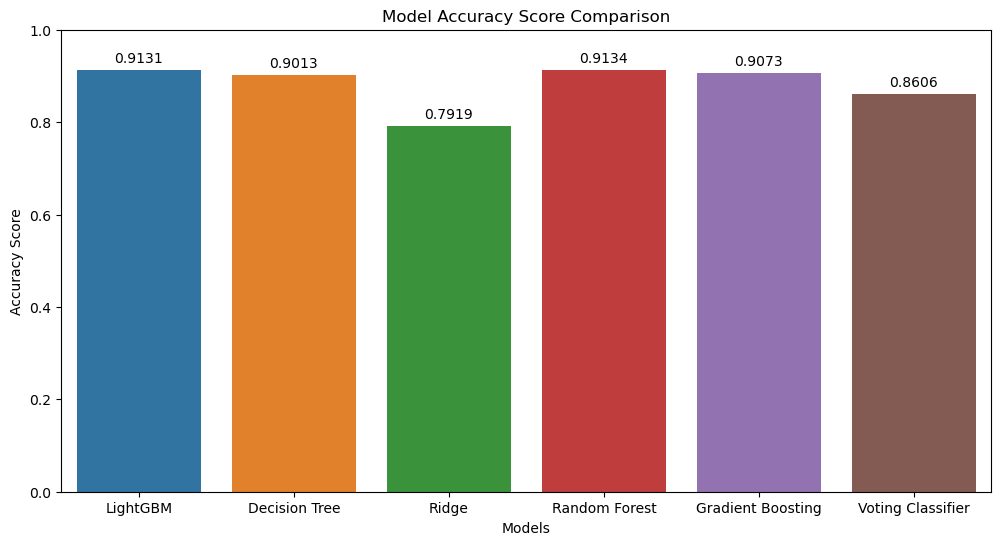

In [58]:
# Accuracy scores from different models
model_names = ['LightGBM', 'Decision Tree', 'Ridge', 'Random Forest', 'Gradient Boosting', 'Voting Classifier']
accuracy_scores = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred2),
    accuracy_score(y_test, y_pred3),
    accuracy_score(y_test, y_pred4),
    accuracy_score(y_test, y_pred5),
    accuracy_score(y_test, y_pred6)
]

plt.figure(figsize=(12,6))
ax = sns.barplot(x=model_names, y=accuracy_scores)
plt.title('Model Accuracy Score Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)

# Annotate the bars with the accuracy scores
for i in range(len(model_names)):
    plt.text(i, accuracy_scores[i] + 0.01, f"{accuracy_scores[i]:.4f}", ha='center', va='bottom')

plt.show()



# WEATHER FORECASTING

In [3]:
def forecast_weather(location, temperature, humidity, wind_speed, precipitation, cloud_cover, atmospheric_pressure, uv_index, season, visibility):
    if temperature > 40 and humidity < 30 and precipitation < 10:
        return "Hot and dry with low chance of rain"
    elif precipitation > 50 or cloud_cover == "overcast":
        return "Rain likely"
    elif wind_speed > 40:
        return "Windy with possible dust or storms"
    elif cloud_cover in ["partly cloudy", "mostly cloudy"]:
        return "Partly cloudy with mild conditions"
    else:
        return "Clear and stable weather"

# User input
location = 'in'
temperature = 45.0
humidity = 20
wind_speed = 50.0
precipitation = 20.0
cloud_cover = 'partly cloudy'
atmospheric_pressure = 510.0
uv_index = 3
season = 'Summer'
visibility = 8.0

# Prediction
predicted_weather = forecast_weather(location, temperature, humidity, wind_speed, precipitation, cloud_cover, atmospheric_pressure, uv_index, season, visibility)
print(f"The forecasted weather for {location} is: {predicted_weather}")


The forecasted weather for in is: Windy with possible dust or storms
